In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

plt.style.use('ggplot')

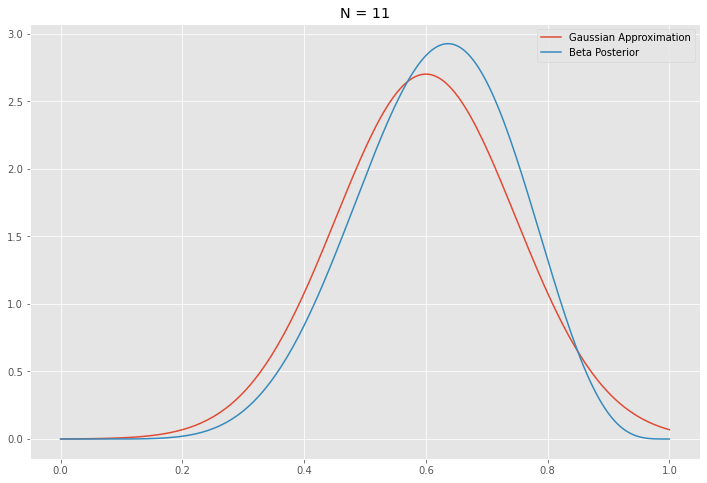

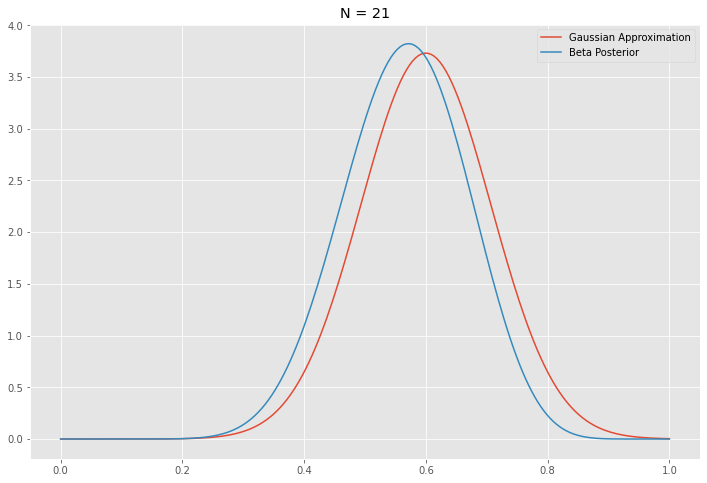

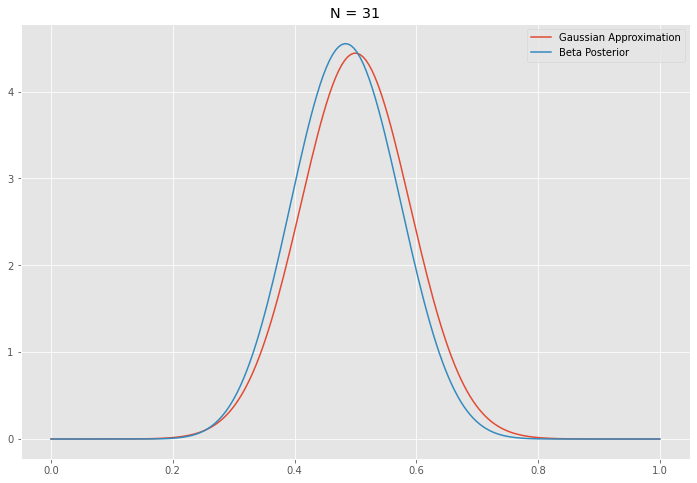

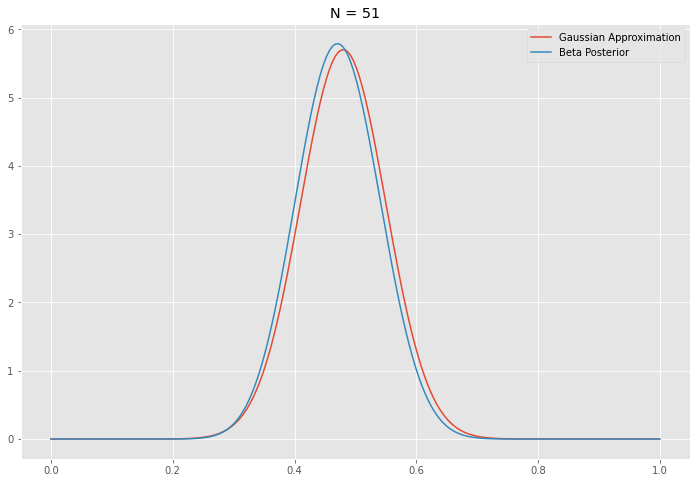

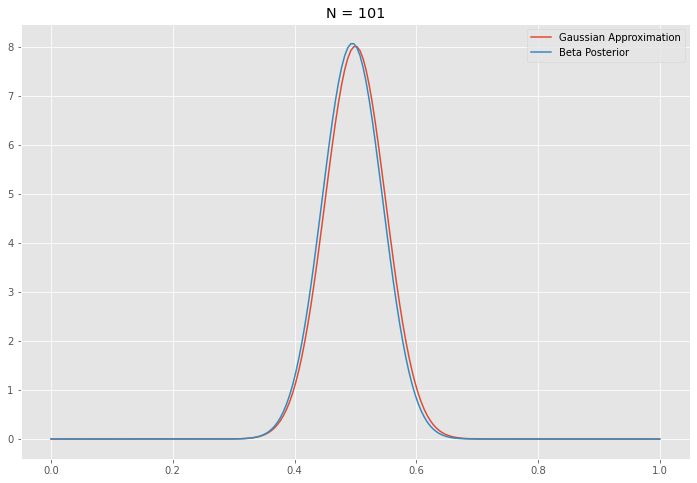

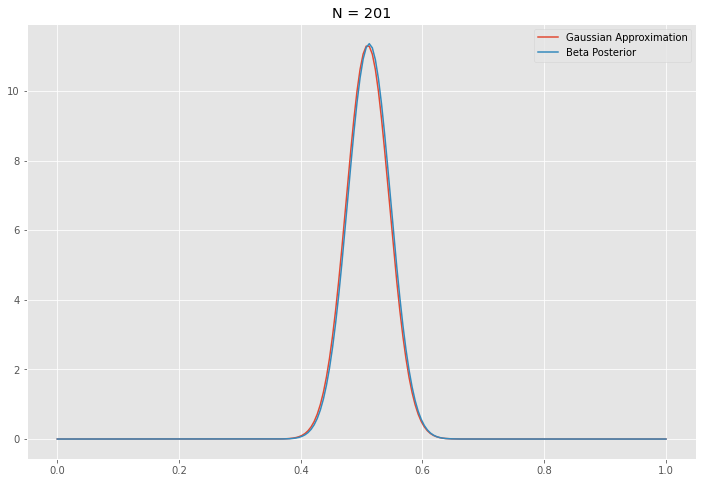

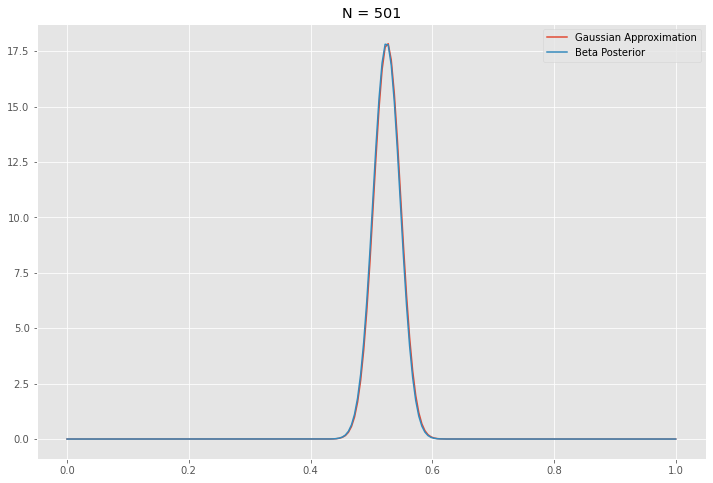

In [9]:
# CTR A/B testing
T = 501 
true_ctr = 0.5
a, b = 1, 1
plot_indices = (10, 20, 30, 50, 100, 200, 500)
data = np.empty(T)
for i in range(T):
    x = 1 if np.random.random() < true_ctr else 0
    data[i] = x

    # Update parameters for posterior
    a += x
    b += 1 - x
    
    if i in plot_indices:
        p = data[:i].mean()
        n = i + 1
        sd = np.sqrt(p * (1 - p) / n)

        x = np.linspace(0, 1, 200)
        g = norm.pdf(x, loc=p, scale=sd)
        plt.figure(figsize=(12, 8))
        plt.plot(x, g, label="Gaussian Approximation")

        posterior = beta.pdf(x, a=a, b=b)
        plt.plot(x, posterior, label='Beta Posterior')
        plt.legend()
        plt.title(f"N = {n}")
        plt.show()